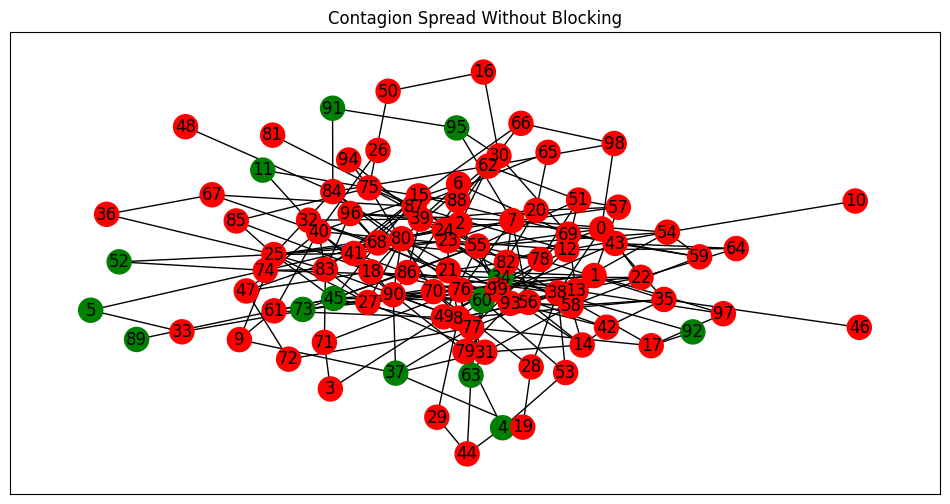

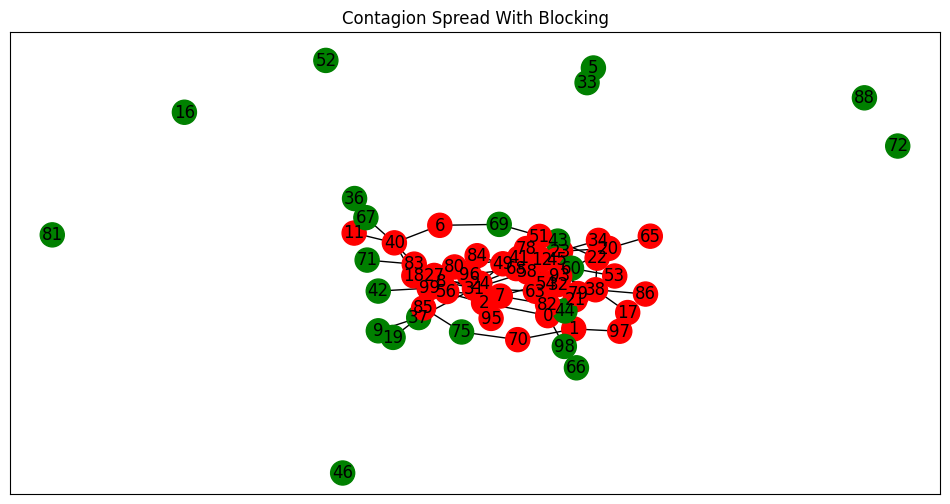

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

# Parameters for the Erdős–Rényi model
n = 100  # number of nodes
p = 0.05  # probability of edge creation

# Graph Generation
G = nx.erdos_renyi_graph(n, p)

# Dominating Set Calculation
def find_dominating_set(G):
    nodes = set(G.nodes())
    dominating_set = set()
    while nodes:
        max_cover_node = max(nodes, key=lambda n: len(set(G[n]) - dominating_set))
        dominating_set.add(max_cover_node)
        nodes -= set(G[max_cover_node]) | {max_cover_node}
    return dominating_set


# High Degree Heuristic Calculation
def find_high_degree_nodes(G, b):
    degrees = G.degree()
    sorted_degrees = sorted(degrees, key=lambda x: x[1], reverse=True)
    return {node for node, degree in sorted_degrees[:b]}

# Contagion Simulation with Thresholds
def simulate_contagion(G, initial_infected, infection_rate=0.3, steps=10, thresholds=None):
    if thresholds is None:
        thresholds = {node: 1 for node in G}  # Default threshold of 1 for all nodes
    infected = set(initial_infected)
    for _ in range(steps):
        new_infected = set()
        for node in G:
            if node not in infected:
                neighbors = set(G.neighbors(node))
                infected_neighbors = len(neighbors & infected)
                if infected_neighbors >= thresholds[node] and random.random() < infection_rate:
                    new_infected.add(node)
        infected.update(new_infected)
    return infected



# Simulation with Blocking
def simulate_with_blocking(G, blocking_nodes):
    G_blocked = G.copy()
    G_blocked.remove_nodes_from(blocking_nodes)
    return G_blocked

# Parameter Testing and Reporting
def parameter_testing(G, infection_rates, steps_list, thresholds_list):
    results = []
    for infection_rate in infection_rates:
        for steps in steps_list:
            for threshold_val in thresholds_list:
                initial_infected = {random.choice(list(G.nodes()))}
                thresholds = {node: threshold_val for node in G}  # Threshold for contagion
                infected = simulate_contagion(G, initial_infected, infection_rate, steps, thresholds)
                results.append({
                    'infection_rate': infection_rate,
                    'steps': steps,
                    'threshold': threshold_val,
                    'infected_count': len(infected)
                })
    return pd.DataFrame(results)

# Run Parameter Testing
infection_rates = [0.1, 0.2, 0.3, 0.4, 0.5]  # Varying infection rates
steps_list = [5, 10, 15]  # Number of steps in the simulation
thresholds_list = [1, 2]  # Different thresholds for contagion spread

df_results = parameter_testing(G, infection_rates, steps_list, thresholds_list)

# Save results to CSV for further analysis
df_results.to_csv('simulation_results.csv', index=False)

# Visualization Function
def visualize(G, infected, title):
    plt.figure(figsize=(12, 6))
    color_map = ['red' if node in infected else 'green' for node in G.nodes()]
    nx.draw_networkx(G, node_color=color_map, with_labels=True)
    plt.title(title)

# Comparative Analysis
# (The rest of the comparative analysis function and subsequent code remains unchanged)

# Visualization of one instance (optional)
initial_infected = {random.choice(list(G.nodes()))}
visualize(G, simulate_contagion(G, initial_infected), "Contagion Spread Without Blocking")
dominating_set = find_dominating_set(G)
G_blocked = simulate_with_blocking(G, dominating_set)
infected_with_blocking = simulate_contagion(G_blocked, initial_infected)
visualize(G_blocked, infected_with_blocking, "Contagion Spread With Blocking")
plt.show()
